In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/admission-predict/Admission_Predict.csv


In [2]:
# Reading the dataset

In [3]:
dataframe = pd.read_csv("/kaggle/input/admission-predict/Admission_Predict.csv")

In [4]:
dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
dataframe.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
dataframe.shape

(400, 9)

![](http://)Drop Serial No. column from data frame

In [8]:
dataframe.drop(['Serial No.'], axis =1, inplace=True)

In [9]:
dataframe

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [10]:
column_names = {'GRE Score': 'gre_score', 'TOEFL Score': 'toefl_score', 'University Rating': 'university_rating', \
                'SOP': 'sop', 'LOR': 'lor', 'CGPA': 'cgpa',\
                'Research': 'research', 'Chance of Admit ': 'chance_of_admit'}

***Rename Column Name***

In [11]:
dataframe = dataframe.rename(columns = column_names)
dataframe.head()

,gre_score,toefl_score,university_rating,sop,LOR,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
dataframe.dtypes

gre_score              int64
toefl_score            int64
university_rating      int64
sop                  float64
LOR                  float64
cgpa                 float64
research               int64
chance_of_admit      float64
dtype: object

In [13]:
for data in dataframe.columns:
    print(data)
    print(dataframe[data].unique())
    print("="*80)

gre_score
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
toefl_score
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
university_rating
[4 3 2 5 1]
sop
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
LOR 
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
cgpa
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.2

*Checking for any null value in dataset*
**

In [14]:
dataframe.isnull().any()


gre_score            False
toefl_score          False
university_rating    False
sop                  False
LOR                  False
cgpa                 False
research             False
chance_of_admit      False
dtype: bool

Data Visualization ****

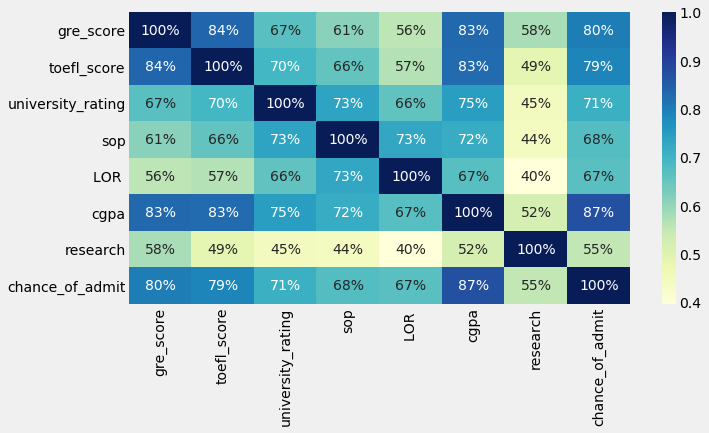

In [15]:
plt.subplots(figsize=(10, 5))
sns.heatmap(dataframe.corr(), cmap="YlGnBu", annot=True, fmt= '.0%')
plt.show()

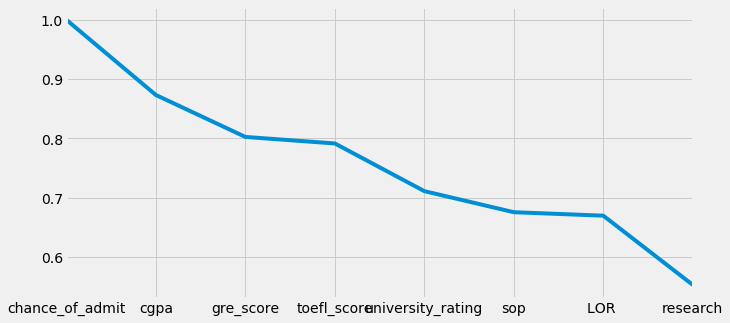

In [16]:
plt.subplots(figsize=(10, 5))
dataframe.corr().loc['chance_of_admit'].sort_values(ascending=False).plot(kind='line')

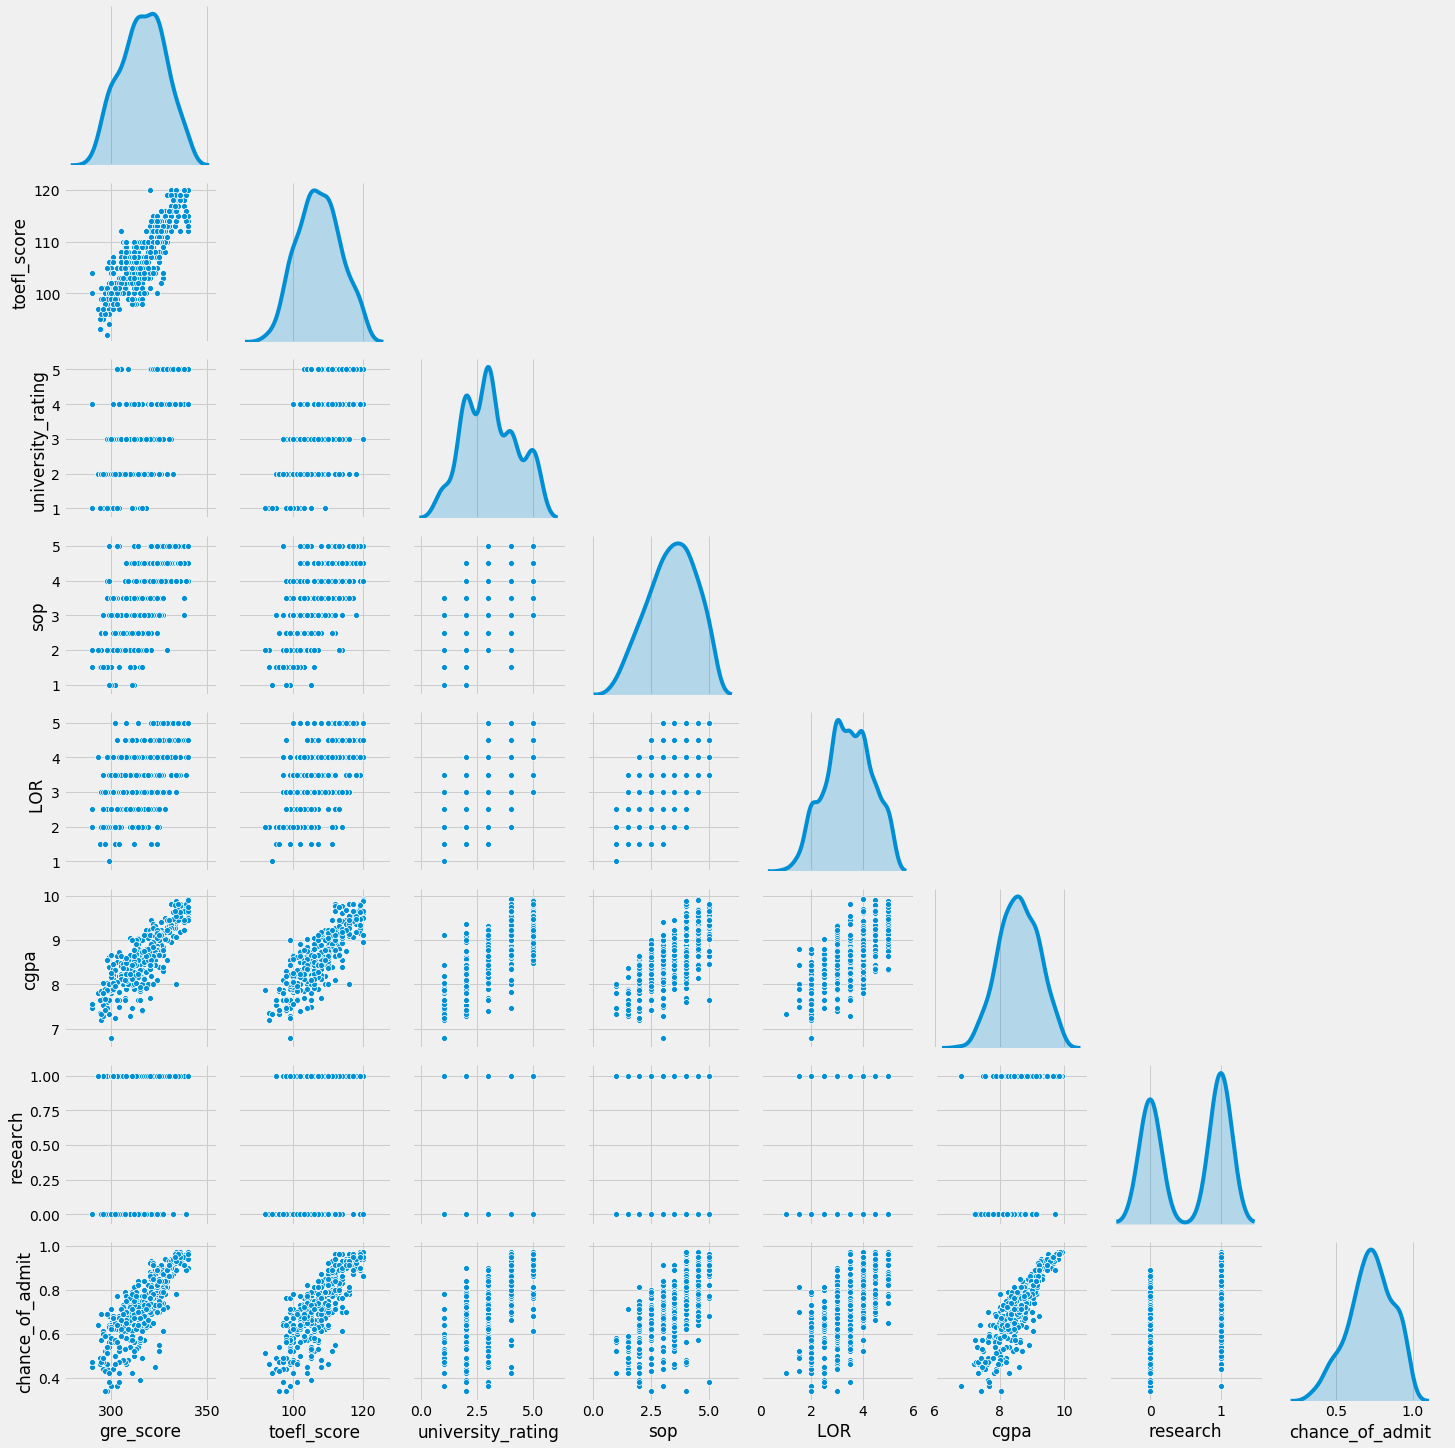

In [17]:
sns.pairplot(dataframe, corner=True, diag_kind="kde")

Importance of Research to get an Admission in Graduation Programme

In [18]:
print(f"{dataframe['research'].value_counts()/len(dataset)}")
print("="*80)
sns.countplot(dataframe['research'])

NameError: name 'dataset' is not defined

Analysis of  CGPA vs GRE Score 

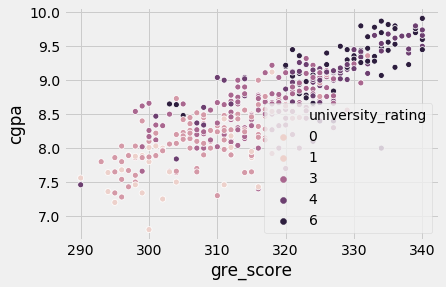

In [19]:
sns.scatterplot(y="cgpa", x="gre_score", hue="university_rating", data=dataframe)

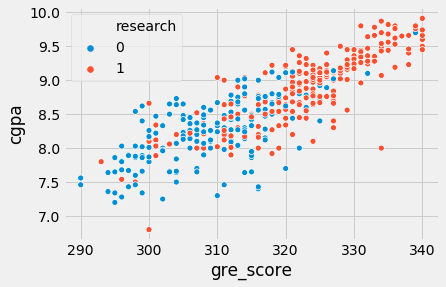

In [20]:
sns.scatterplot(y="cgpa", x="gre_score", hue="research", data=dataframe)